<a href="https://colab.research.google.com/github/dandukhovnij/Python-Projects/blob/main/Exploratory_data_analysis_for_online_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [370]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [371]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [372]:
%cd /content/drive/MyDrive/Work

/content/drive/MyDrive/Work


In [373]:
countries_data = pd.read_csv("countries.csv")
countries_data.head(5)

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [374]:
countries_data.shape

(249, 5)

In [375]:
countries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [376]:
events_data = pd.read_csv("events.csv")
events_data.head(5)

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


In [377]:
events_data.shape

(1330, 10)

In [378]:
events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


In [379]:
products_data = pd.read_csv("products.csv")
products_data.head(5)

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


In [380]:
products_data.shape

(12, 2)

In [381]:
products_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


Let's look at the missing values ​​in countries_data

In [382]:
countries_data.isna().sum()

,0
name,0
alpha-2,1
alpha-3,0
region,1
sub-region,1


Let's look at the percentage of missing values ​​in countries_data

In [383]:
countries_data.isna().sum() / countries_data.shape[0] * 100

,0
name,0.000000
alpha-2,0.401606
alpha-3,0.000000
region,0.401606
sub-region,0.401606


Let's look at the missing values ​​in event_data

In [384]:
events_data.isna().sum()

,0
Order ID,0
Order Date,0
Ship Date,0
Order Priority,0
Country Code,82
Product ID,0
Sales Channel,0
Units Sold,2
Unit Price,0
Unit Cost,0


Let's look at the percentage of missing values ​​in events_data

In [385]:
events_data.isna().sum() / events_data.shape[0] * 100

,0
Order ID,0.000000
Order Date,0.000000
Ship Date,0.000000
Order Priority,0.000000
Country Code,6.165414
Product ID,0.000000
Sales Channel,0.000000
Units Sold,0.150376
Unit Price,0.000000
Unit Cost,0.000000


Let's look at missing values ​​in products_data

In [386]:
products_data.isna().sum()

,0
id,0
item_type,0


Delete and fill in missing values ​​from tables

In [387]:
countries_data = countries_data.dropna()

In [388]:
events_data["Units Sold"] = events_data["Units Sold"].fillna(events_data["Units Sold"].median())

In [389]:
events_data = events_data.dropna()

Rows with missing values ​​were removed as there is no universal option to fill them in. Only units sold was filled in because median could be used to fill in there.

Convert the data type from the events_data table in the Order Date and Ship Date columns to datetime

In [390]:
events_data["Order Date"] = pd.to_datetime(events_data["Order Date"])
events_data["Ship Date"] = pd.to_datetime(events_data["Ship Date"])

Check data for duplicates

In [391]:
countries_data.duplicated().sum()

np.int64(0)

In [392]:
events_data.duplicated().sum()

np.int64(0)

In [393]:
products_data.duplicated().sum()

np.int64(0)

Check the data for anomalies

In [394]:
events_data[["Units Sold", "Unit Price", "Unit Cost"]].describe()

,Units Sold,Unit Price,Unit Cost
count,1248.000000,1248.000000,1248.000000
mean,4953.201122,264.183526,186.349143
std,2913.485966,216.526905,175.473997
min,2.000000,9.330000,6.920000
25%,2349.750000,81.730000,35.840000
50%,4971.500000,154.060000,97.440000
75%,7471.000000,425.717500,263.330000
max,9999.000000,668.270000,524.960000


Дублікати та аномалії в даних не були знайдені.

Removing unnecessary columns

In [395]:
countries_data = countries_data.drop("alpha-2", axis=1)

Rename the columns to countries_data

In [396]:
countries_data = countries_data.rename(columns={"alpha-3": "Country Code", "name": "Name", "region": "Region", "sub-region": "Sub-region"})

Perform dataframe merging

In [397]:
data = pd.merge(countries_data, events_data, on="Country Code", how="inner")

Rename the columns to events_data

In [398]:
products_data = products_data.rename(columns={"id": "Product ID", "item_type": "Item Type"})

Performing the final dataframe join

In [399]:
data = pd.merge(data, products_data, on="Product ID", how="inner")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Name            1248 non-null   object        
 1   Country Code    1248 non-null   object        
 2   Region          1248 non-null   object        
 3   Sub-region      1248 non-null   object        
 4   Order ID        1248 non-null   int64         
 5   Order Date      1248 non-null   datetime64[ns]
 6   Ship Date       1248 non-null   datetime64[ns]
 7   Order Priority  1248 non-null   object        
 8   Product ID      1248 non-null   int64         
 9   Sales Channel   1248 non-null   object        
 10  Units Sold      1248 non-null   float64       
 11  Unit Price      1248 non-null   float64       
 12  Unit Cost       1248 non-null   float64       
 13  Item Type       1248 non-null   object        
dtypes: datetime64[ns](2), float64(3), int64(2), object(7)
me

Calculate and add new columns to the dataframe for further calculations

In [400]:
data['Shipping Days'] = (data['Ship Date'] - data['Order Date']).dt.days
data["Revenue"] = data["Units Sold"] * data["Unit Price"]
data["Cost"] = data["Units Sold"] * data["Unit Cost"]
data["Profit"] = data["Revenue"] - data["Cost"]
data.head(5)

,Name,Country Code,Region,Sub-region,Order ID,Order Date,Ship Date,Order Priority,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,Item Type,Shipping Days,Revenue,Cost,Profit
0,Albania,ALB,Europe,Southern Europe,152191388,2012-05-18,2012-06-22,L,7331,Offline,5669.0,255.28,159.42,Baby Food,35,1447182.32,903751.98,543430.34
1,Albania,ALB,Europe,Southern Europe,208238399,2015-08-29,2015-10-15,L,8293,Offline,1224.0,437.20,263.33,Cosmetics,47,535132.80,322315.92,212816.88
2,Albania,ALB,Europe,Southern Europe,246922719,2015-07-13,2015-07-29,H,8681,Online,8775.0,651.21,524.96,Office Supplies,16,5714367.75,4606524.00,1107843.75
3,Albania,ALB,Europe,Southern Europe,270358788,2014-12-11,2015-01-24,M,1270,Offline,4028.0,47.45,31.79,Beverages,44,191128.60,128050.12,63078.48
4,Albania,ALB,Europe,Southern Europe,357930982,2016-01-16,2016-03-05,C,2455,Offline,8586.0,109.28,35.84,Clothes,49,938278.08,307722.24,630555.84


Calculate key metrics of the company's performance

In [401]:
print(f"Total Orders: {data['Order ID'].count()}")
print(f"Total Units Sold: {data['Units Sold'].sum()}")
print(f"Total Revenue: {data['Revenue'].sum()}")
print(f"Total Cost: {data['Cost'].sum()}")
print(f"Total Profit: {data['Profit'].sum()}")
print(f"Counties Covered: {data['Name'].nunique()}")
print(f"Average Units Per Order: {data['Units Sold'].mean()}")
print(f"Average Profit Per Order: {data['Profit'].mean()}")
print(f"Average Unit Price: {data['Unit Price'].mean()}")
print(f"Average Unit Cost: {data['Unit Cost'].mean()}")
print(f"Average Shipping Days: {data['Shipping Days'].mean()}")
print(f"Median Shipping Days: {data['Shipping Days'].median()}")
print(f"Max Shipping Days: {data['Shipping Days'].max()}")
print(f"Min Shipping Days: {data['Shipping Days'].min()}")


Total Orders: 1248
Total Units Sold: 6181595.0
Total Revenue: 1601482723.7
Total Cost: 1127365514.52
Total Profit: 474117209.17999995
Counties Covered: 45
Average Units Per Order: 4953.201121794872
Average Profit Per Order: 379901.6099198717
Average Unit Price: 264.1835256410256
Average Unit Cost: 186.3491426282051
Average Shipping Days: 24.86378205128205
Median Shipping Days: 25.0
Max Shipping Days: 50
Min Shipping Days: 0


Visualize and analyze sales by categories, countries and regions

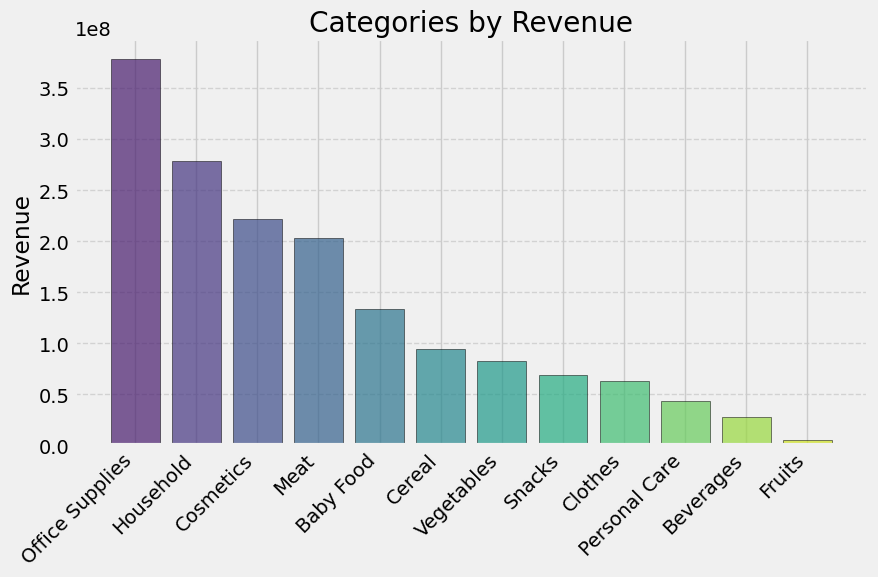

In [402]:
plt.style.use('fivethirtyeight')

categories = (data.groupby('Item Type')['Revenue'].sum().sort_values(ascending=False))

colors = sns.color_palette("viridis", len(categories))

plt.figure(figsize=(9,6))
plt.bar(categories.index, categories.values, color=colors, edgecolor='black', alpha=0.7)
plt.title("Categories by Revenue")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Revenue")
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()


The highest revenues were generated in the categories: Office Supplies, Household and Cosmetics, and the lowest in Fruits, Beverages, Personal Care.

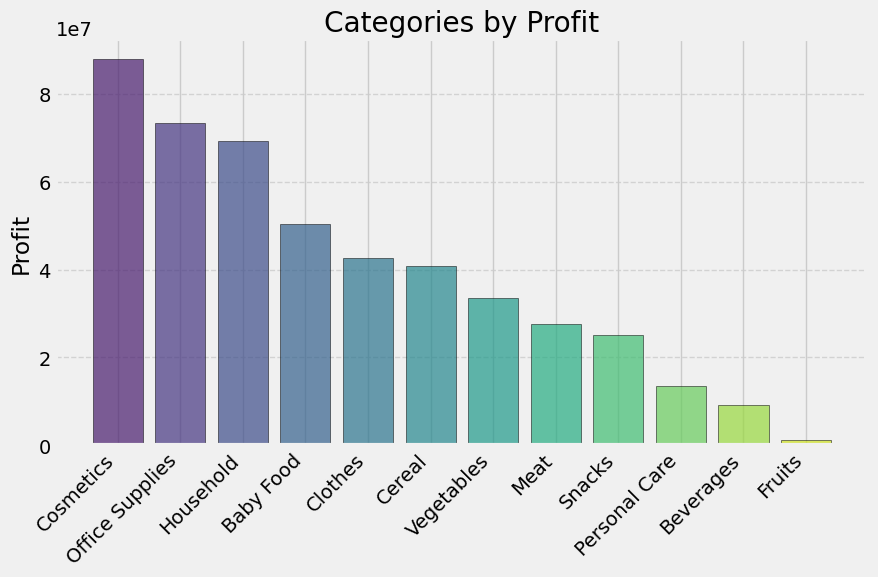

In [403]:
categories = (data.groupby('Item Type')['Profit'].sum().sort_values(ascending=False))
colors = sns.color_palette("viridis", len(categories))

plt.figure(figsize=(9,6))
plt.bar(categories.index, categories.values, color=colors, edgecolor='black', alpha=0.7)
plt.title("Categories by Profit")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Profit")
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

The highest profits were made in the categories: Cosmetics, Office Supplies and Household, and the lowest in Fruits, Beverages, Personal Care.

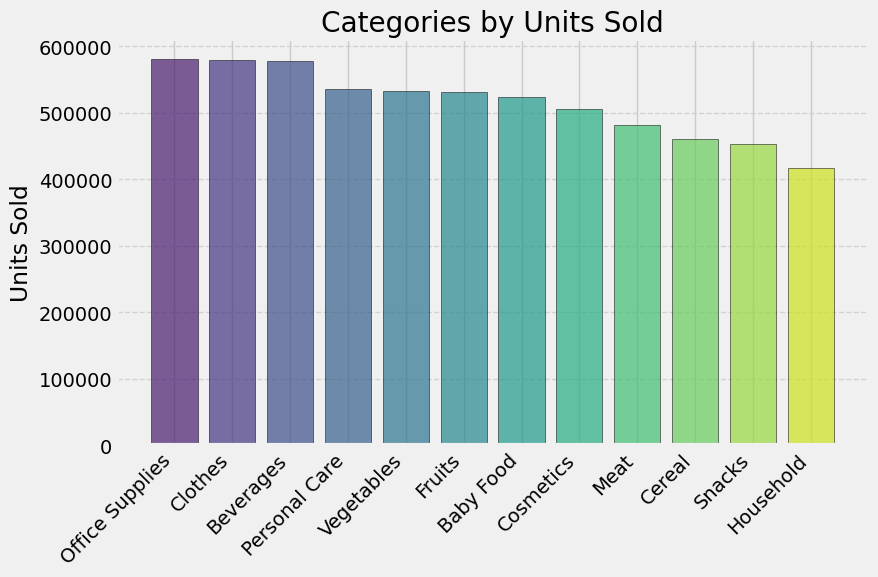

In [404]:
categories = (data.groupby('Item Type')['Units Sold'].sum().sort_values(ascending=False))
colors = sns.color_palette("viridis", len(categories))

plt.figure(figsize=(9,6))
plt.bar(categories.index, categories.values, color=colors, edgecolor='black', alpha=0.7)
plt.title("Categories by Units Sold")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Units Sold")
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

The largest number of products was sold in the categories: Office Supplies, Clothes and Beverages, and the smallest in Household, Snacks, Cereal.

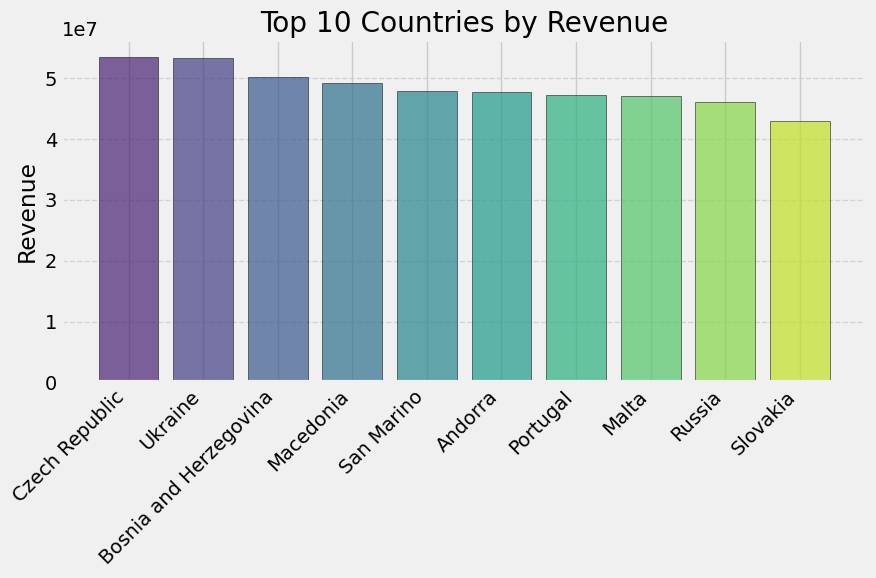

In [405]:
countries = (data.groupby('Name')['Revenue'].sum().sort_values(ascending=False).head(10))
colors = sns.color_palette("viridis", len(countries))

plt.figure(figsize=(9,6))
plt.bar(countries.index, countries.values, color=colors, edgecolor='black', alpha=0.7)
plt.title("Top 10 Countries by Revenue")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Revenue")
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

The highest income was received in the following countries: Czech Republic, Ukraine, Bosnia and Herzegovina

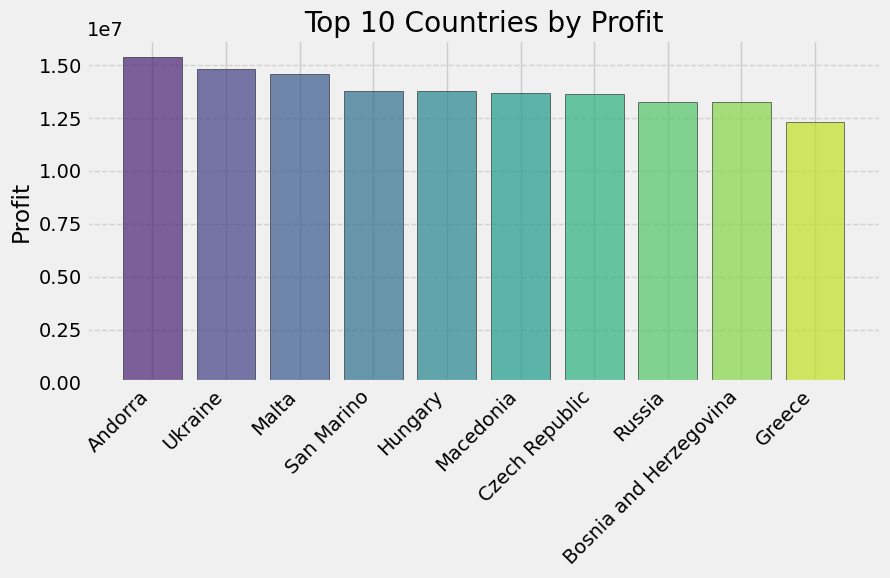

In [406]:
countries = (data.groupby('Name')['Profit'].sum().sort_values(ascending=False).head(10))
colors = sns.color_palette("viridis", len(countries))

plt.figure(figsize=(9,6))
plt.bar(countries.index, countries.values, color=colors, edgecolor='black', alpha=0.7)
plt.title("Top 10 Countries by Profit")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Profit")
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

The highest profit was received in the following countries: Andorra, Ukraine, Malta

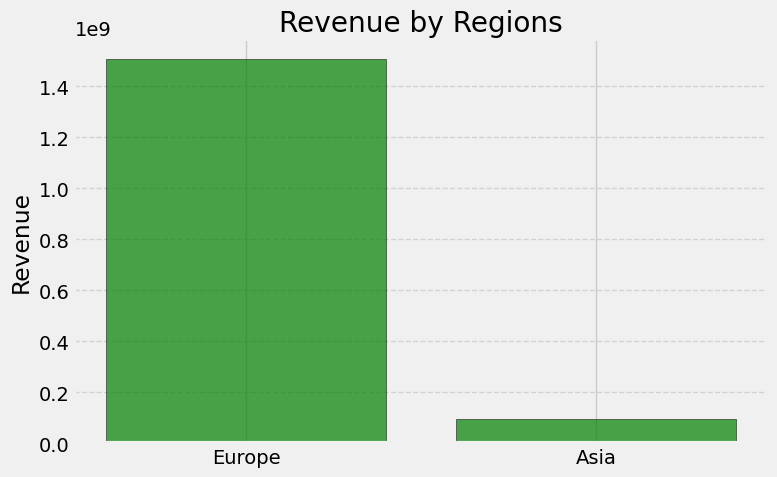

In [407]:
regions = (data.groupby('Region')['Revenue'].sum().sort_values(ascending=False))

plt.figure(figsize=(8,5))
plt.bar(regions.index, regions.values, color='green', edgecolor='black', alpha=0.7)
plt.title("Revenue by Regions")
plt.ylabel("Revenue")
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

Income in Europe is significantly higher than income in Asia

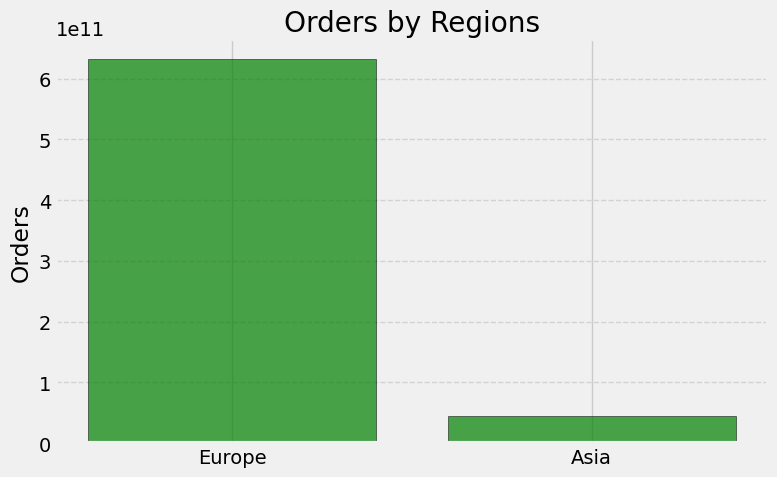

In [408]:
regions = (data.groupby('Region')['Order ID'].sum().sort_values(ascending=False))

plt.figure(figsize=(8,5))
plt.bar(regions.index, regions.values, color='green', edgecolor='black', alpha=0.7)
plt.title("Orders by Regions")
plt.ylabel("Orders")
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

Bring the data from the Sales Channel column to the same register

In [409]:
data['Sales Channel'] = data['Sales Channel'].str.capitalize()

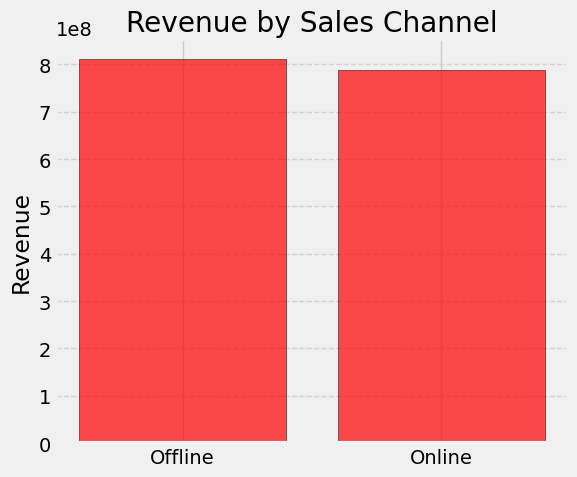

In [410]:
channels = (data.groupby('Sales Channel')['Revenue'].sum().sort_values(ascending=False))

plt.figure(figsize=(6,5))
plt.bar(channels.index, channels.values, color='red', edgecolor='black', alpha=0.7)
plt.title("Revenue by Sales Channel")
plt.ylabel("Revenue")
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

Offline income is slightly higher than online income

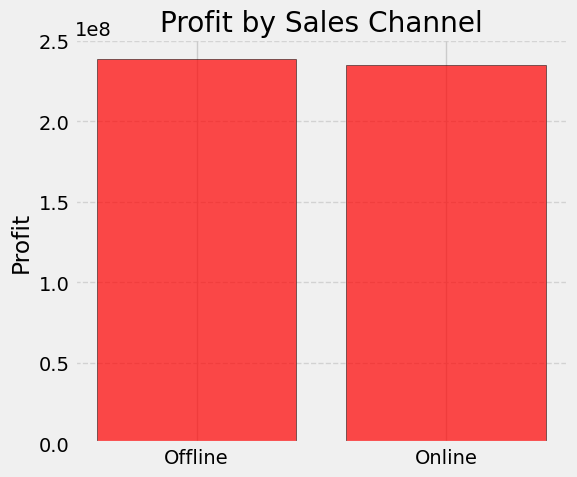

In [411]:
channels = (data.groupby('Sales Channel')['Profit'].sum().sort_values(ascending=False))

plt.figure(figsize=(6,5))
plt.bar(channels.index, channels.values, color='red', edgecolor='black', alpha=0.7)
plt.title("Profit by Sales Channel")
plt.ylabel("Profit")
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

Offline profit is slightly higher than online profit according to revenue

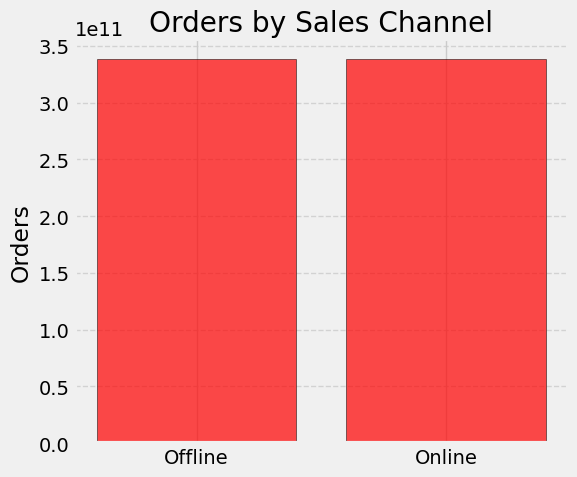

In [412]:
channels = (data.groupby('Sales Channel')['Order ID'].sum().sort_values(ascending=False))

plt.figure(figsize=(6,5))
plt.bar(channels.index, channels.values, color='red', edgecolor='black', alpha=0.7)
plt.title("Orders by Sales Channel")
plt.ylabel("Orders")
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

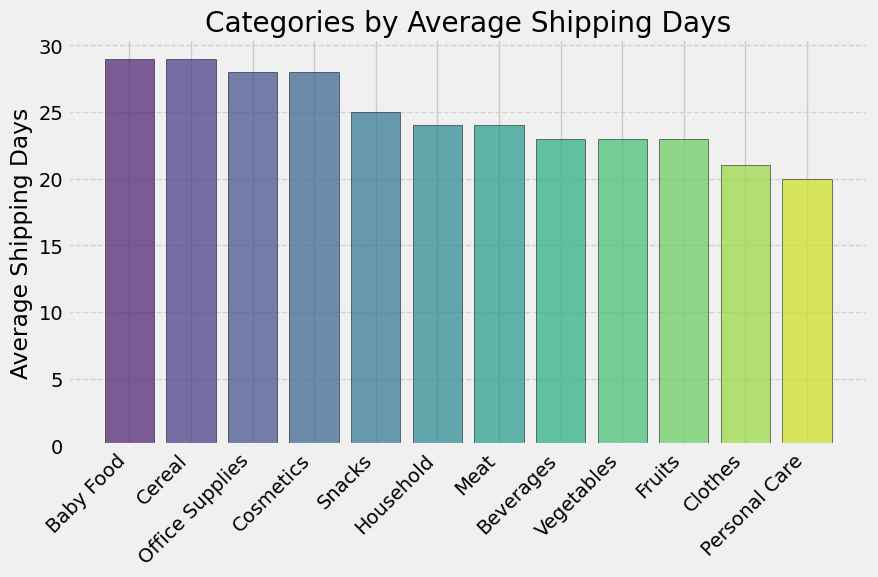

In [413]:
categories = (data.groupby('Item Type')['Shipping Days'].median().sort_values(ascending=False))
colors = sns.color_palette("viridis", len(categories))

plt.figure(figsize=(9,6))
plt.bar(categories.index, categories.values, color=colors, edgecolor='black', alpha=0.7)
plt.title("Categories by Average Shipping Days")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Average Shipping Days")
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

On average, the longest delivery time is in the categories: Baby Food, Cereal, Office Supplies, and the fastest in Personal Care, Clothes, Fruits.

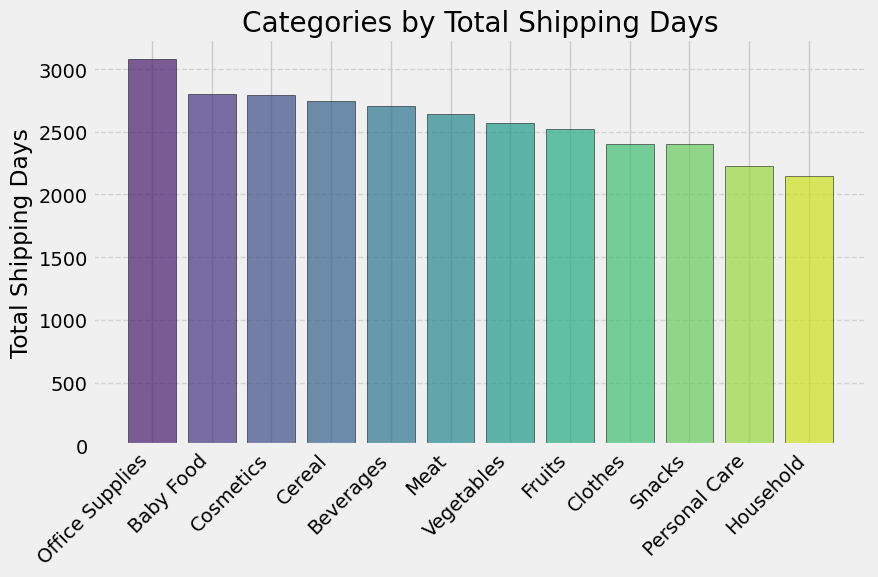

In [414]:
categories = (data.groupby('Item Type')['Shipping Days'].sum().sort_values(ascending=False))
colors = sns.color_palette("viridis", len(categories))

plt.figure(figsize=(9,6))
plt.bar(categories.index, categories.values, color=colors, edgecolor='black', alpha=0.7)
plt.title("Categories by Total Shipping Days")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Total Shipping Days")
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

Overall, the longest delivery times are in the following categories: Cereal, Office Supplies, Baby Food, Cosmetics, and the fastest in Snacks, Clothes, Fruits.

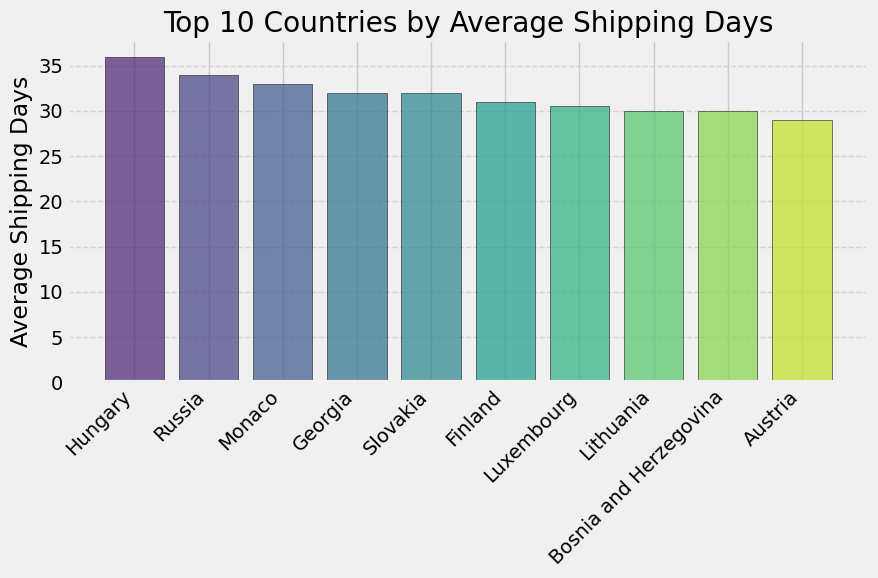

In [415]:
countries = (data.groupby('Name')['Shipping Days'].median().sort_values(ascending=False).head(10))
colors = sns.color_palette("viridis", len(countries))

plt.figure(figsize=(9,6))
plt.bar(countries.index, countries.values, color=colors, edgecolor='black', alpha=0.7)
plt.title("Top 10 Countries by Average Shipping Days")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Average Shipping Days")
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

On average, the longest delivery time is through the following countries: Hungary, Russia, Monaco, and the fastest through Austria, Bosnia and Herzegovina, Lithuania.

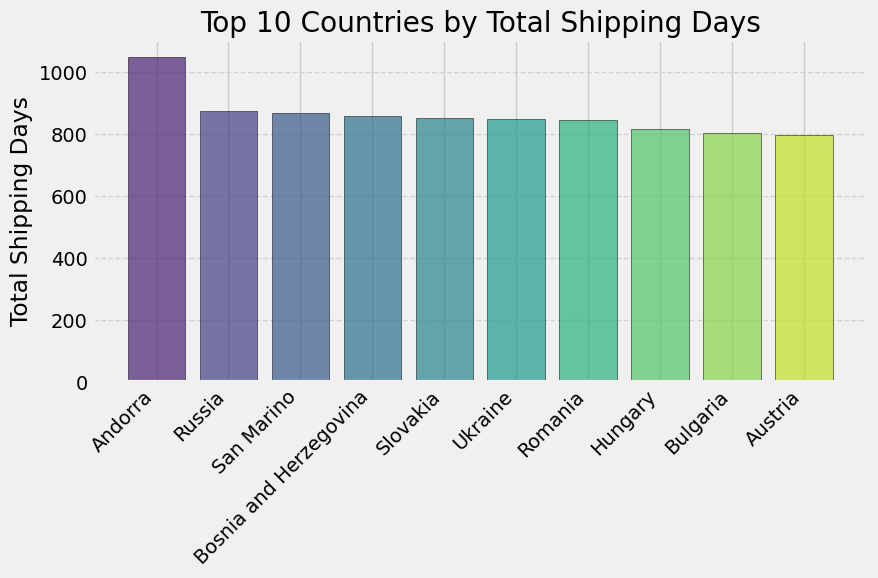

In [416]:
countries = (data.groupby('Name')['Shipping Days'].sum().sort_values(ascending=False).head(10))
colors = sns.color_palette("viridis", len(countries))

plt.figure(figsize=(9,6))
plt.bar(countries.index, countries.values, color=colors, edgecolor='black', alpha=0.7)
plt.title("Top 10 Countries by Total Shipping Days")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Total Shipping Days")
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

In total, the longest delivery time is through the following countries: Andorra, Russia, San Marino, and the fastest through Austria, Bulgaria, Hungary.

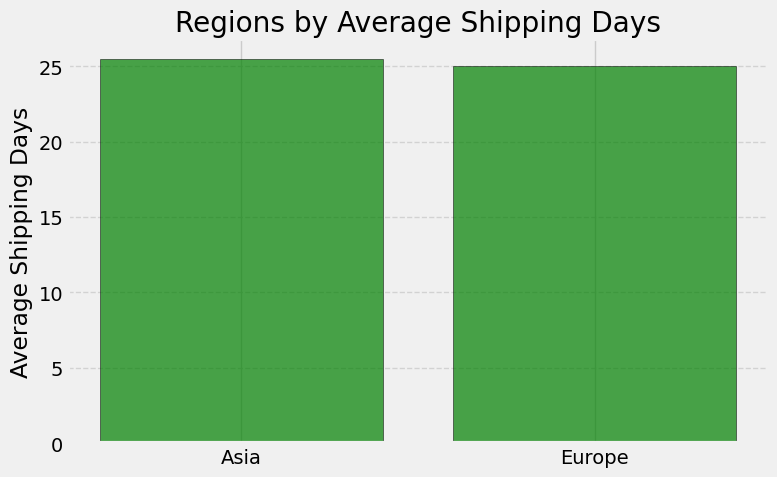

In [417]:
regions = (data.groupby('Region')['Shipping Days'].median().sort_values(ascending=False))

plt.figure(figsize=(8,5))
plt.bar(regions.index, regions.values, color='green', edgecolor='black', alpha=0.7)
plt.title("Regions by Average Shipping Days")
plt.ylabel("Average Shipping Days")
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

On average, delivery days in Asia are slightly longer than in Europe.

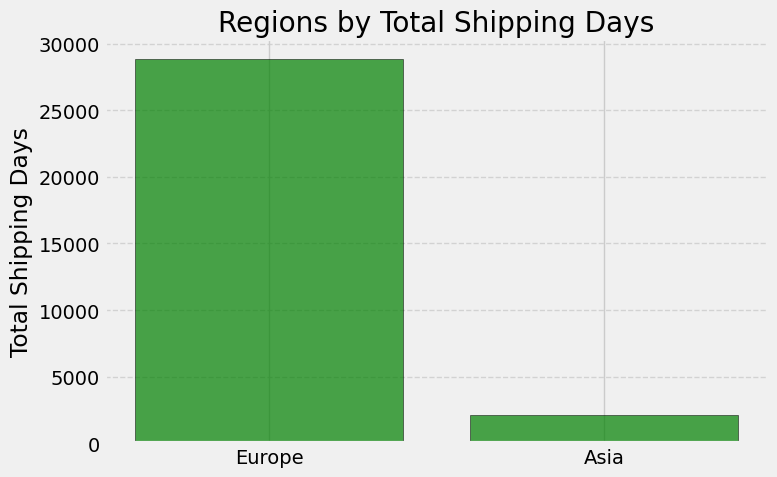

In [418]:
regions = (data.groupby('Region')['Shipping Days'].sum().sort_values(ascending=False))

plt.figure(figsize=(8,5))
plt.bar(regions.index, regions.values, color='green', edgecolor='black', alpha=0.7)
plt.title("Regions by Total Shipping Days")
plt.ylabel("Total Shipping Days")
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

In total, delivery days in Europe are much longer than in Asia. This means that there are much more orders in Europe

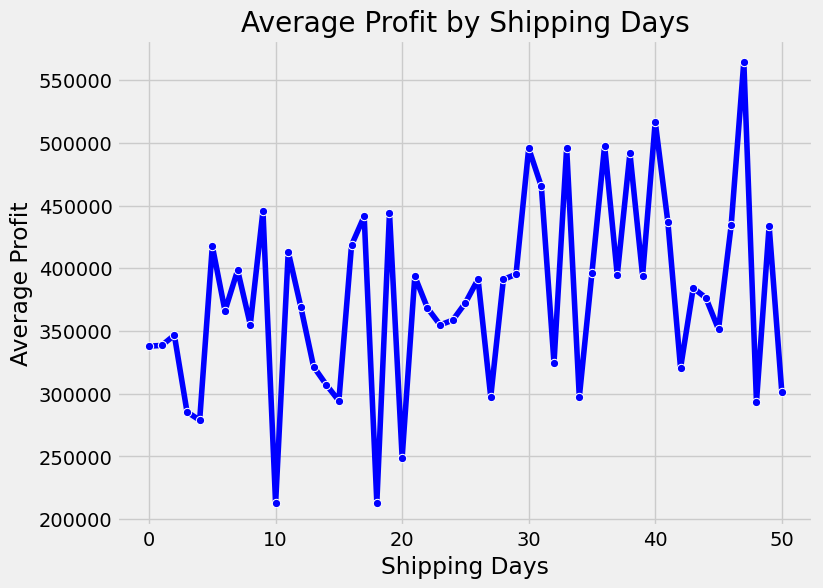

In [419]:
profit_by_shipping_days = data.groupby("Shipping Days")["Profit"].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.lineplot(data=profit_by_shipping_days, x="Shipping Days", y="Profit", marker='o', color='blue')
plt.title("Average Profit by Shipping Days")
plt.xlabel("Shipping Days")
plt.ylabel("Average Profit")
plt.show()

As can be seen from the visualization, the largest upfront profit is obtained with delivery in 47 days.

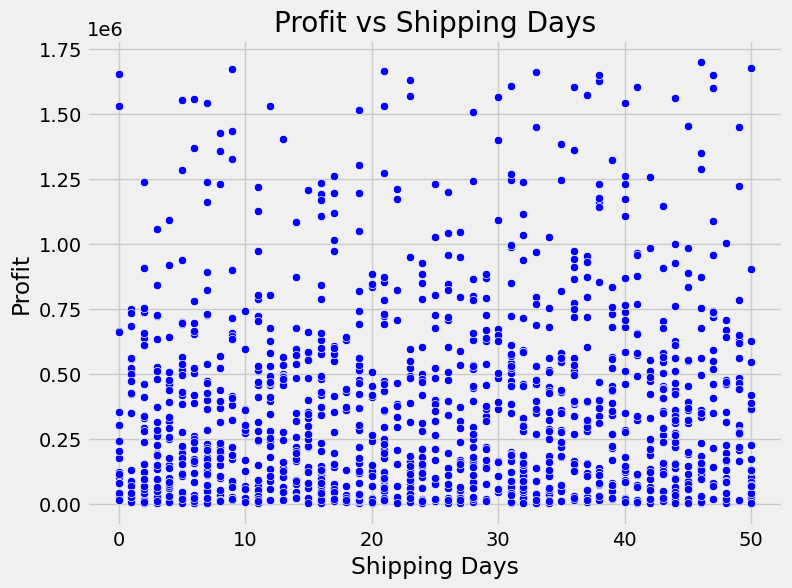

In [420]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, y="Profit", x="Shipping Days", color='blue')
plt.title("Profit vs Shipping Days")
plt.xlabel("Shipping Days")
plt.ylabel("Profit")
plt.show()

The scatterplot shows that there is no correlation between profit and delivery days.

In [421]:
data["Order YearMonth"] = data["Order Date"].dt.to_period("M")

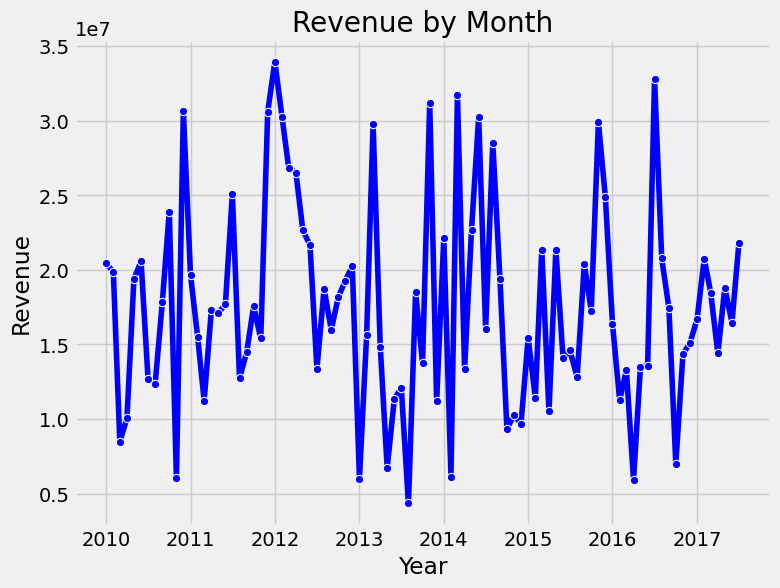

In [422]:
monthly_revenue = data.groupby('Order YearMonth')['Revenue'].sum().reset_index()
monthly_revenue['Order YearMonth'] = monthly_revenue['Order YearMonth'].dt.to_timestamp()

plt.figure(figsize=(8, 6))
sns.lineplot(data=monthly_revenue, x="Order YearMonth", y="Revenue", marker="o", color='blue')
plt.title("Revenue by Month")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.show()

In [423]:
data["Order Year"] = data["Order Date"].dt.year

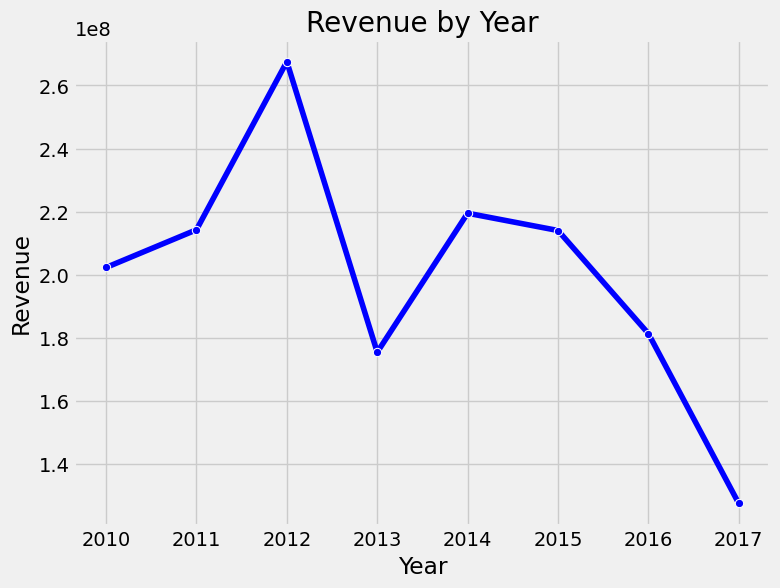

In [424]:
monthly_revenue = data.groupby('Order Year')['Revenue'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.lineplot(data=monthly_revenue, x="Order Year", y="Revenue", marker="o", color='blue')
plt.title("Revenue by Year")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.show()

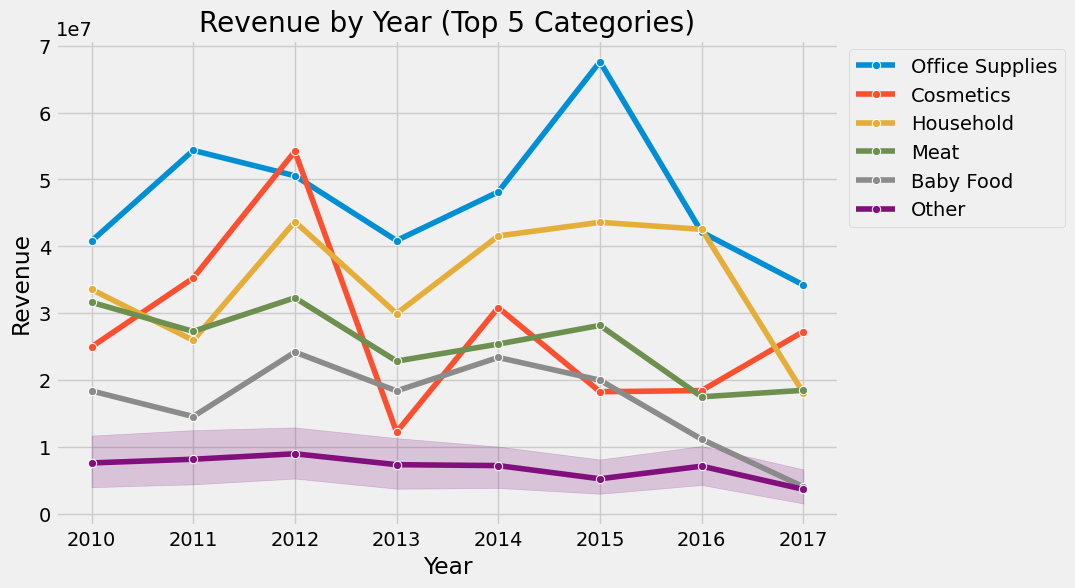

In [425]:
categories = (data.groupby(['Order Year', 'Item Type'])['Revenue'].sum().sort_values(ascending=False).reset_index())

top_categories = categories.groupby('Item Type')['Revenue'].sum().nlargest(5).index

categories['Categories'] = categories['Item Type'].apply(lambda x: x if x in top_categories else 'Other')

grouped_data_for_plot = categories.groupby(['Order Year', 'Categories'])['Revenue'].sum().reset_index()

plt.figure(figsize=(9, 6))
sns.lineplot(data=categories, x="Order Year", y="Revenue", hue="Categories", marker="o")
plt.title("Revenue by Year (Top 5 Categories)")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

As we can see by the 5 largest categories by revenue, over the past year the revenues of most of them have fallen, such categories as: Office Supplies, Household, Baby Food. And some have grown: Cosmetics, Meat. In general, there is more decline than growth

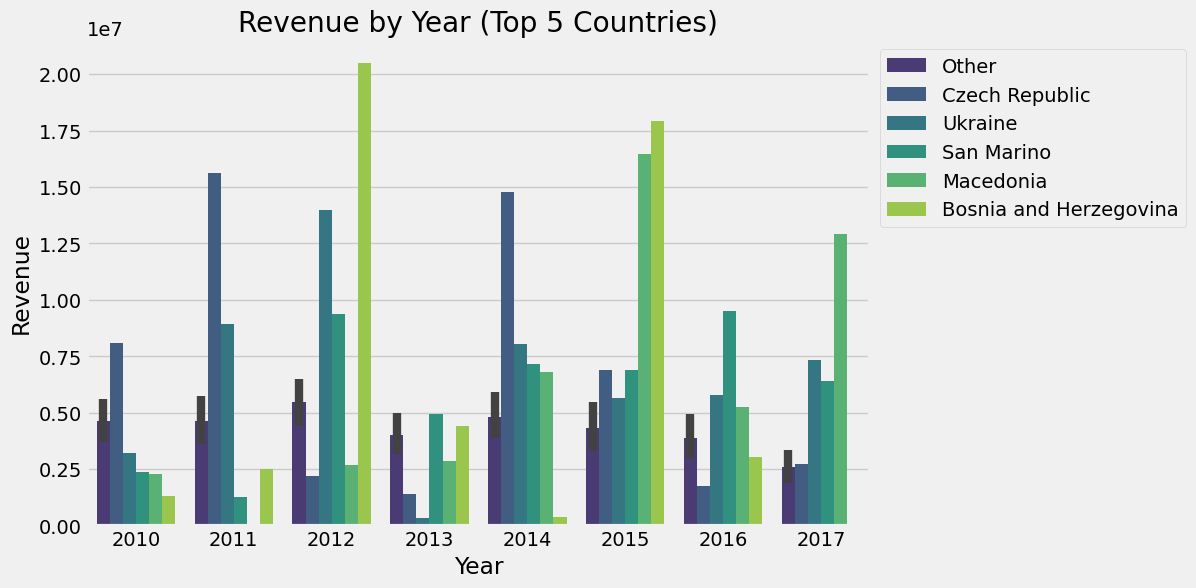

In [426]:
countries = (data.groupby(['Order Year', 'Name'])['Revenue'].sum().sort_values(ascending=False).reset_index())

top_countries = countries.groupby('Name')['Revenue'].sum().nlargest(5).index

countries['Country'] = countries['Name'].apply(lambda x: x if x in top_countries else 'Other')

grouped_data_for_plot = countries.groupby(['Order Year', 'Country'])['Revenue'].sum().reset_index()

plt.figure(figsize=(9, 6))
sns.barplot(data=countries, x="Order Year", y="Revenue", hue="Country", palette="viridis")
plt.title("Revenue by Year (Top 5 Countries)")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

The highest income of all time was in 2012 in Bosnia and Herzegovina. But in general, incomes across countries are highly uneven and unpredictable, as can be seen in the example of Bosnia and Herzegovina.

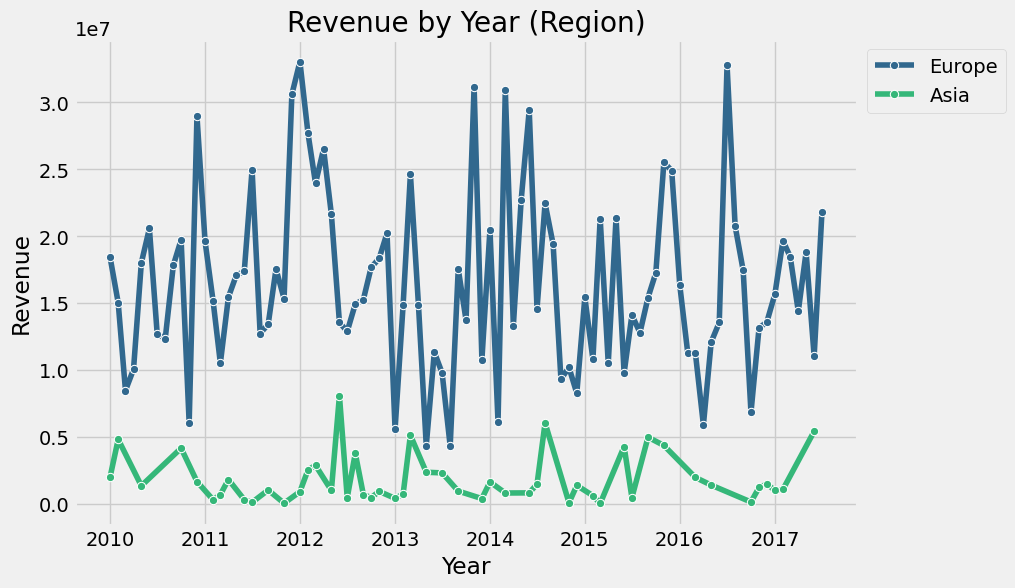

In [427]:
categories_monthly = (data.groupby(['Order YearMonth', 'Region'] )['Revenue'].sum().sort_values(ascending=False).reset_index())
categories_monthly['Order YearMonth'] = categories_monthly['Order YearMonth'].dt.to_timestamp()

plt.figure(figsize=(9, 6))
sns.lineplot(data=categories_monthly, x="Order YearMonth", y="Revenue", hue="Region", marker="o", palette="viridis")
plt.title("Revenue by Year (Region)")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

The highest monthly income was recorded in 2012 and 2016

Create a column for the days of the week

In [428]:
data['Day of Week'] = data['Order Date'].dt.day_name()

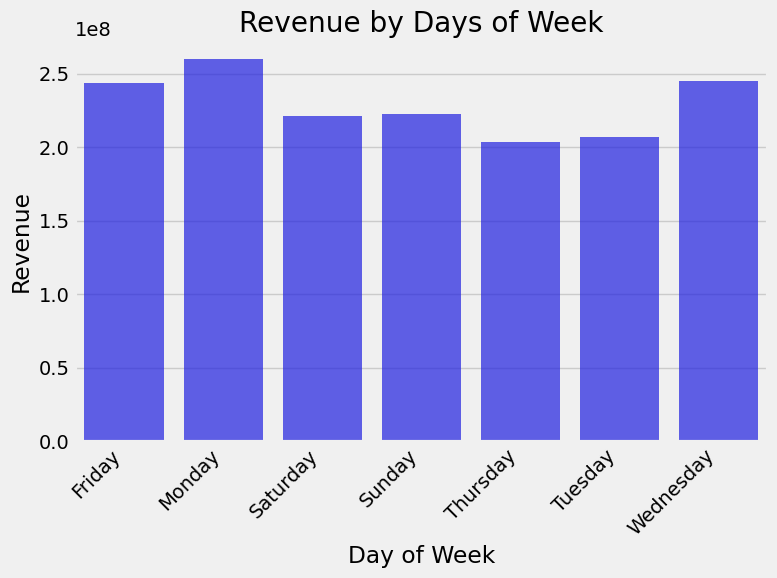

In [429]:
sales_by_day_item = data.groupby(['Day of Week'])['Revenue'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=sales_by_day_item, x='Day of Week', y='Revenue', color="blue", alpha=0.7)
plt.title('Revenue by Days of Week')
plt.xlabel('Day of Week')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The highest income is observed on Monday, Wednesday and Friday

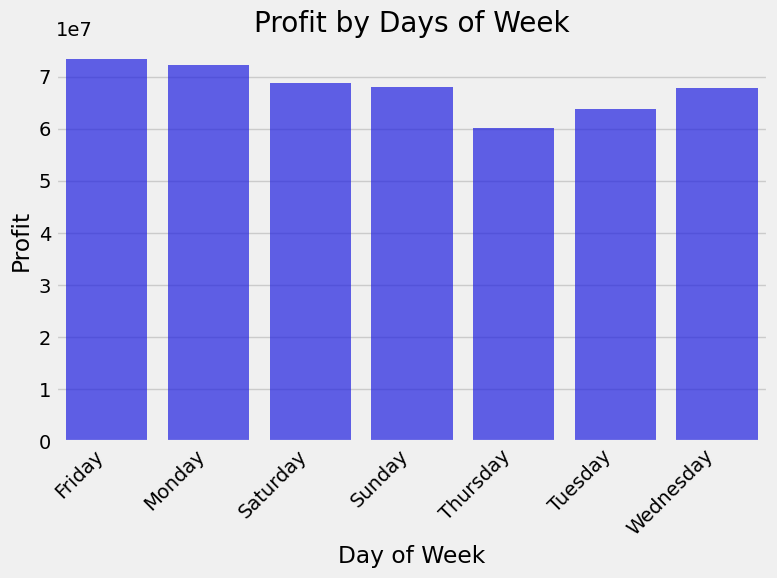

In [430]:
sales_by_day_item = data.groupby(['Day of Week'])['Profit'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=sales_by_day_item, x='Day of Week', y='Profit', color="blue", alpha=0.7)
plt.title('Profit by Days of Week')
plt.xlabel('Day of Week')
plt.ylabel('Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The biggest profits are observed on Friday and Monday

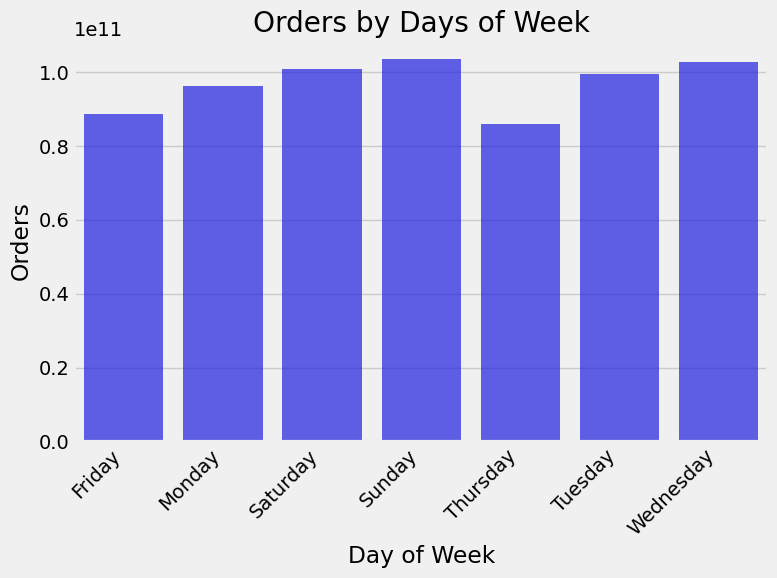

In [431]:
sales_by_day_item = data.groupby(['Day of Week'])['Order ID'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=sales_by_day_item, x='Day of Week', y='Order ID', color="blue", alpha=0.7)
plt.title('Orders by Days of Week')
plt.xlabel('Day of Week')
plt.ylabel('Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Most orders are placed on Saturday, Wednesday and Friday

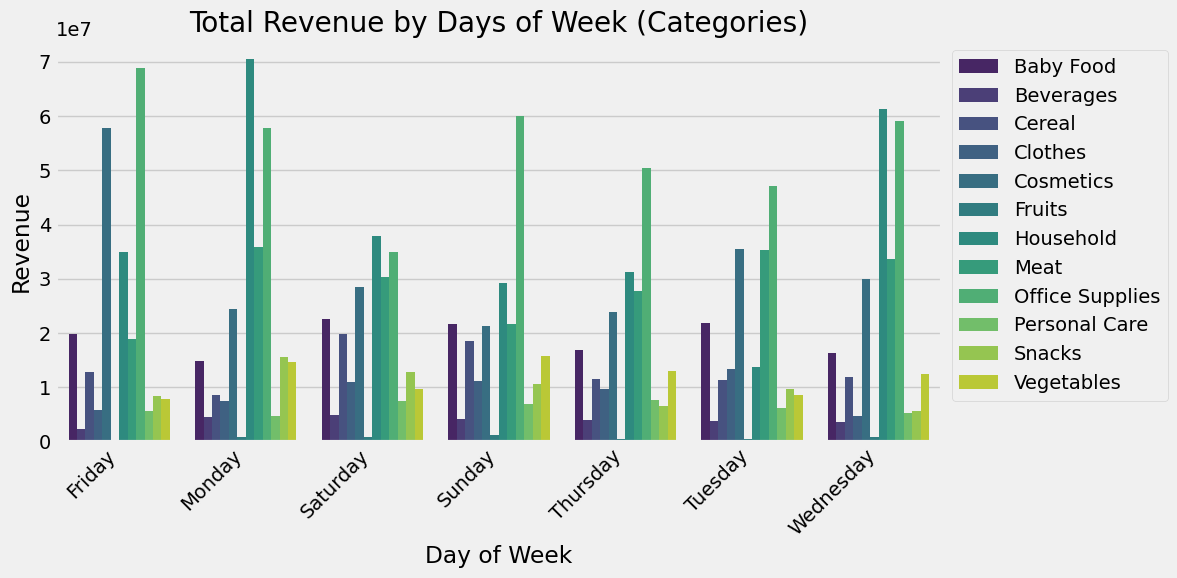

In [432]:
sales_by_day_item = data.groupby(['Day of Week', 'Item Type'])['Revenue'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_day_item, x='Day of Week', y='Revenue', hue='Item Type', palette='viridis')
plt.title('Total Revenue by Days of Week (Categories)')
plt.xlabel('Day of Week')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

From the visualization, I can say that the Household category brings in especially a lot of revenue on Mondays and Wednesdays, and Cosmetics on Fridays.

Conclusion: The most profitable product categories are Cosmetics, Office Supplies and Household, so it is worth focusing on them. The least profitable are Fruits, Beverages, Personal Care, it may be worth reviewing the strategy for these product categories. Many countries are at approximately the same level in terms of income, but the highest income was received in the countries: Chech Republic, Ukraine, Bosnia and Herzegovina, and the highest income was received in the countries: Andorra, Ukraine, Malta. Income in Europe is significantly higher than income in Asia. As a result of the study of sales channels, it becomes obvious that there is no significant difference in income from online and offline sales. On average, delivery takes the longest in the categories: Baby Food, Cereal, Office Supplies, and the fastest in Personal Care, Clothes, Fruits, and among the countries, delivery takes the longest through Hungary, Russia, Monaco, and the fastest through Austria, Bosnia and Herzegovina, Lithuania. On average, in Asia, delivery days are slightly longer than in Europe, so we can say that the Asian market is inferior to Europe only in sales volumes, and not significantly in sales efficiency. It turned out that there is no correlation between profit and delivery days. In the 5 largest categories by revenue over the past year, the revenues of most of them have fallen, such categories as: Office Supplies, Household, Baby Food. And some have grown: Cosmetics, Meat. In general, there is a greater decline than growth, which is confirmed by the dynamics of revenue by year. Most orders are placed on Saturday, Wednesday and Friday, and the greatest profit is observed on Friday and Monday, so you can organize promotions and other events for these.